#  Modeling $CO_2$ molecular vibrations over the symmetric stretch mode

|||
|-|-|
|**Authors:** |Taha Selim, Alain Chancé|
|**Date:** |June 23, 2023|
|**Version:** |**1.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Prof. Gerrit C. Groenenboom, Quantum theoretical chemistry (NWI-MOL112), May 26, 2023](https://www.theochem.ru.nl/ctc2/pdf/qtclecture.pdf)
[Prof. Gerrit C. Groenenboom, Computational and Theoretical Chemistry 2, NWI-MOL176 (3EC)](https://www.theochem.ru.nl/ctc2/)
[Keeper L. Sharkey, Alain Chancé, Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code, ISBN-13: 978-1803243900](https://www.amazon.com/Quantum-Chemistry-Computing-Curious-Illustrated/dp/1803243902/)


# MIT License

Copyright (c) 2023 Taha Selim, Alain Chancé

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Description
## Purpose

This Jupyter notebook demonstrates a model of $CO_2$ molecular vibrations over the symmetric stretch mode close to the diatomic case. 

We have two methods to calculate the vibrational frequencies: grid methods and variational methods. Grid methods are suitable for calculations executed on the CPUs and GPUs. The variational approach uses the second quantization to express the Hamiltonian making it a a good candidate for qubit calculations. 

### Math notations

$\underline{X}$ is a matrix of a column vector

${\underline{\underline{X}}}$ is a square matrix

## Grid method: Construct the Hamiltonian 

We write first the Hamiltonian expression in a grid method.

Theory: over one vibrational mode such the case of CO system,

$\hat{H} = \frac{1}{2 μ} \frac{∂^{2}}{∂r^{2}} + \hat{V}$ \\
where $ħ = 1$ in atomic units.


$H_{molecule} = \hat{T} + \hat{V}$. 


In matrix notation:
$H_{molecule} = {\underline{\underline{T}}}  + 
                {\underline{\underline{V}}} $.

${\underline{\underline{V}}}$ is a diagonal matrix of $\underline{V}$

## Compute the kinetic energy operator

We use a finite difference approximation:

\begin{aligned}
\frac{d^{2} \psi\left(x_{i}\right)}{d x^{2}} &=\frac{\left.\frac{d \psi\left(x_{i}\right)}{d x}\right|_{\text {forward }}-\left.\frac{d \psi\left(x_{i}\right)}{d x}\right|_{b a c k w a r d}}{\ell} \\
&=\frac{\frac{\psi\left(x_{i+1}\right)-\psi\left(x_{i}\right)}{\ell}-\frac{\psi\left(x_{i}\right)-\psi\left(x_{i-1}\right)}{\ell}}{\ell} \\
&=\frac{\psi\left(x_{i+1}\right)-2 \psi\left(x_{i}\right)+\psi\left(x_{i-1}\right)}{\ell^{2}}
\end{aligned}

Now, we write the Hamiltonian using the second quantization. 

$$\hat{H}=\frac{1}{2 \mu} p_x^2+\frac{1}{2} k x^2$$

we have the following commutation relation:
$$\left[x, p_x\right]=i \hbar$$


to eliminate the units:
let $$q=\alpha x$$ and $$p = \frac{1}{\alpha \hbar} p_{x} $$
The Hamiltonian will be: 
$$\hat{H}=\frac{\alpha^2 \hbar^2}{2 \mu} p^2+\frac{1}{2} \frac{k}{\alpha^2} q^2$$

Equate the coefficients of $p^{2}$ and $q^{2}$:
 $$\frac{\alpha^2 \hbar^2}{\mu}=\frac{k}{\alpha^2}$$

gives

$$\alpha^2=\frac{\sqrt{\mu k}}{\hbar}$$

The Hamiltonian becomes 
$$
\hat{H}=\hbar \omega \frac{1}{2}\left(p^2+q^2\right)=\hbar \omega\left(\hat{N}+\frac{1}{2}\right)
$$

where
$$
\begin{aligned}
\omega & \equiv \sqrt{\frac{k}{\mu}} \\
\alpha^2 & =\frac{\mu \omega}{\hbar} \\
a & =\frac{1}{\sqrt{2}}(q+i p) \\
a^{\dagger} & =\frac{1}{\sqrt{2}}(q-i p) \\
\hat{N} & =a^{\dagger} a .
\end{aligned}
$$

We will use $\alpha$ to scale the normal coordinate. 

### Normal coordinate different representations

In this section, we describe several ways to scale the normal coordinate. 
We start first by defining the types of normal coordinate representations. 

$q$ is the cartesian representation of the normal coordinates: it is related to the actual atomic displacements of the atoms.  

$\widetilde{Q}$ is the canonical normal coordinate (dimensionless).


The relation between the canonical normal coordinate and the cartesian one is:

$$ 
q=\sqrt{\frac{\hbar}{\mu \omega}} \widetilde{Q}
$$ 

and 
$$
\widetilde{Q} = \sqrt{\frac{\mu \omega }{\hbar}} q
$$


# Install Julia packages
Install packages with the following commands inside the Julia terminal.

Package Parameters
```
julia> using Pkg
julia> Pkg.add("Parameters")
```
Package Plots
```
julia> Pkg.add("Plots")
```
Packages Polynomials and Special Polynomials
```
julia> import Pkg
julia> Pkg.add("Polynomials")
julia> Pkg.add("SpecialPolynomials")
```

In [1]:
using Plots # or StatsPlots
using LinearAlgebra

## Define parameters

In [2]:
len = 100
QQ = range(-1, 1, length=len)
verbose1 = true
n_points = 10000
n_states = 4

4

## Define constants

In [3]:
const cm1 = 0.000004556335252750422::Float64 # used to convert the potential from Eh to cm^-1
const Ang = 1.889726133921251660652::Float64 # used to convert from Ang to bohrs 
const mC = 21874.6617573460462154::Float64
const mO = 29156.94559967216628138::Float64
const mu_co2 = 2*mO::Float64
const omegacm1 = 1333.0::Float64
const omega = omegacm1*cm1::Float64
const r_co = 2.1958618::Float64 # equilibrium bond length in bohrs
const pi = 3.1415926535897932384626433832795029::Float64  

3.141592653589793

## Define and set up a HarmonicOscillator_grid structure for $CO_2$

In order to define the Hamiltonian describing the normal mode, we start by defining the effective reduced mass $\mu$ and the atomic displacements as a function of the normal mode. We use the normal mode definition to evaluate the harmonic potential over the symmetric stretch

### Define function V_harm(Q,omg_nu, mu_q)
We use the experimental frequency to construct the harmonic potential. The experimental frequency is taken from NIST. Most of websites show slightly different value for the frequency. It might be because of the chosen basis and parameters in the quantum chemistry packages they are using. However, we use NIST value as the main reference. 

Our harmonic potential uses NIST value. Later in the notebook, we will supply full anharmonic potential computed from Psi4 package.  

In [4]:
function V_harm(Q,omg_nu, mu_q)
    return 0.5*mu_q*(omg_nu^2)*(Q)^2
end

V_harm (generic function with 1 method)

### Define function T_harm(QQ,mu_q)

In [5]:
# Compute the kinetic energy matrix over the grid of QQ
# Define the kinetic energy matrix
function T_harm(QQ,mu_q)
    
    N = length(QQ)
    h = QQ[2]-QQ[1]
    
    T0 = 2 .* ones(1,N)
    T1 = -1 .* ones(1,N-1)
    Tm1 = -1 .* ones(1,N-1)
    
    Tu = Tridiagonal(vec(Tm1),vec(T0),vec(T1))
        
    ## Apply the boundary conditions
    Tu[1,1] = 0
    Tu[1,2] = 0
    Tu[2,1] = 0
    Tu[N-1,N-2] = 0
    Tu[N-2,N-1] = 0
    Tu[N-1,N-1] = 0
    
    T = Tu/(2*mu_q*(h^2))
    
    return T
end

T_harm (generic function with 1 method)

### Define a structure HarmonicOscillator_grid for $CO_2$ using Parameters

In [6]:
using Parameters
@with_kw struct HarmonicOscillator_grid
    len::Int64 = 100
    QQ::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64} = range(-1,1,length=len)
    h::Float64 = QQ[2]-QQ[1]
    mu_co2::Float64 = mu_co2
    mu::Float64 = 2*mO
    omega::Float64 = omega
    zC::Float64 = 0
    zO::Float64 = r_co
    PES::Vector{Float64} = [V_harm(i,omega,mu_co2) for i in QQ] # The potential energy surface over the grid of QQ
    V::Matrix{Float64} = Diagonal(PES)
    T_tridiag::Tridiagonal{Float64, Vector{Float64}} = T_harm(QQ,mu_co2)
    T::Matrix{Float64} = convert(Matrix{Float64}, T_tridiag)
    H::Matrix{Float64} = T+V
    F::Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}} = eigen(Symmetric(H, :L))
    Evalues::Array{Float64} = F.values
    Evectors::Array{Float64} = F.vectors
    C::Array{Float64} = Evectors[1:len,1:len]
    E::Array{Float64} = filter(x->x>0, F.values)
    Ecm1::Array{Float64} = 1.0/cm1 .*E
end

HarmonicOscillator_grid

### Create a HarmonicOscillator_grid structure H_op for $CO_2$

In [7]:
# Creating a HarmonicOscillator_grid structure
H_op = HarmonicOscillator_grid()

HarmonicOscillator_grid
  len: Int64 100
  QQ: StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}
  h: Float64 0.02020202020202022
  mu_co2: Float64 58313.89119934433
  mu: Float64 58313.89119934433
  omega: Float64 0.006073594891916313
  zC: Float64 0.0
  zO: Float64 2.1958618
  PES: Array{Float64}((100,)) [1.07555758879381, 1.0325396748251157, 0.9903996774680273, 0.949137596722545, 0.9087534325886687, 0.8692471850663983, 0.8306188541557339, 0.7928684398566755, 0.7559959421692232, 0.7200013610933771  …  0.7200013610933771, 0.7559959421692232, 0.7928684398566755, 0.8306188541557339, 0.8692471850663983, 0.9087534325886687, 0.949137596722545, 0.9903996774680273, 1.0325396748251157, 1.07555758879381]
  V: Array{Float64}((100, 100)) [1.07555758879381 0.0 … 0.0 0.0; 0.0 1.0325396748251157 … 0.0 0.0; … ; 0.0 0.0 … 1.0325396748251157 0.0; 0.0 0.0 … 0.0 1.07555758879381]
  T_tridiag: Tridiagonal{Float64, Vector{Float64}}
  T: Array{Float64}((100, 100)) [0.

### Define function HarmonicOscillator_grid_init() to update the HarmonicOscillator_grid structure H_op

In [8]:
function HarmonicOscillator_grid_init(H_op::HarmonicOscillator_grid; len=len, mu_co2=mu_co2, omega=omega)
    
    QQ::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64} = range(-1,1,length=len)
    h::Float64 = QQ[2]-QQ[1]  #grid step size
    mu::Float64 = 2*mO
    zC::Float64 = 0
    zO::Float64 = r_co
    PES::Vector{Float64} = [V_harm(i,omega,mu_co2) for i in QQ] # The potential energy surface over the grid of QQ
    V::Matrix{Float64} = Diagonal(PES)
    T_tridiag::Tridiagonal{Float64, Vector{Float64}} = T_harm(QQ,mu_co2)
    T::Matrix{Float64} = convert(Matrix{Float64}, T_tridiag)
    H::Matrix{Float64} = T+V
    F = eigen(Symmetric(H, :L))
    Evalues = F.values
    Evectors = F.vectors
    C = Evectors[1:len,1:len]
    E = filter(x->x>0, F.values)
    Ecm1 = 1.0/cm1 .*E
    
    HarmonicOscillator_grid(len=len, QQ=QQ, h=h, PES=PES, V=V, T_tridiag=T_tridiag, T=T, H=H, F=F, Evalues=Evalues, 
    Evectors=Evectors, C=C, E=E, Ecm1=Ecm1)
    
    return QQ, h, PES, V, T_tridiag, T, H, F, Evalues, Evectors, C, E, Ecm1
end

HarmonicOscillator_grid_init (generic function with 1 method)

### Plot the potential energy surface of $CO_2$ over the symmetric stretch normal coordinate

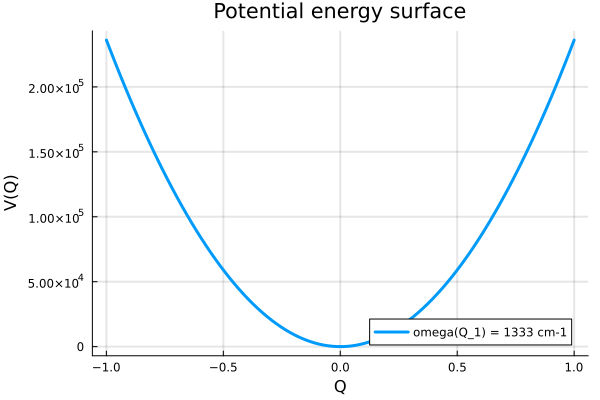

In [9]:
p2 = plot(
    QQ,[V_harm(i,omega,mu_co2)/cm1 for i in QQ], 
    lw=3,
    label=("omega(Q_1) = 1333 cm-1"),
    title="Potential energy surface",
    xlabel=("Q"),
    ylabel=("V(Q)"),
    grid=gridlinewidth=2
    )

plot(p2)

## Compute the vibrational frequency of $CO_2$ on the symmetric stretch normal mode

### Define function vibrational_freq_CO2() to compute the vibrational frequency of $CO_2$

In [10]:
# Compute the vibrational frequency of the CO2 molecule on the symmetric stretch normal mode
function vibrational_freq_CO2(H_op; len=100, verbose::Bool=false)
    QQ, h, PES, V, T_tridiag, T, H, F, Evalues, Evectors, C, E, Ecm1 = HarmonicOscillator_grid_init(H_op, len = len)
    error = Ecm1[2]-Ecm1[1]-omegacm1
    if verbose
        println("\nLength: ", len, " First three eigenvalues of H: ", Evalues[1:3]," Eh")
        println("Length: ", len, " First three eigenvalues of H: ", Evalues[1:3]," Ecm1")
        println("Vibrational frequency of the CO2 molecule : ", Ecm1[2]-Ecm1[1]," cm^-1")
        println("Error: ", error)
    end
    return Ecm1[2]-Ecm1[1], error
end

vibrational_freq_CO2 (generic function with 1 method)

### Check the computation of the vibrational frequency of $CO_2$ on the symmetric stretch normal mode

In [11]:
freq, error = vibrational_freq_CO2(H_op, len=100, verbose=true)


Length: 100 First three eigenvalues of H: [0.003009107700952401, 0.008970879480480767, 0.014818045837078695] Eh
Length: 100 First three eigenvalues of H: [0.003009107700952401, 0.008970879480480767, 0.014818045837078695] Ecm1
Vibrational frequency of the CO2 molecule : 1308.4576636298998 cm^-1
Error: -24.5423363701002


(1308.4576636298998, -24.5423363701002)

### Define function convergence_test() to test the convergence of the vibrational frequency

In [12]:
# function using the HarmonicOscillator_grid to test the convergence based on the number of points in the grid of QQ
function convergence_test(Npoints::Vector{Int64}; verbose::Bool=false)
    len_Npoints = size(Npoints)[1]

    # Define an array for the errors
    error = zeros(len_Npoints)
    
    i = 1
    for l in Npoints
        freq, error[i] = vibrational_freq_CO2(H_op, len=l, verbose=verbose)
        i += 1
    end
    
    # Write script to plot error vs number of points in the grid of QQ
    p1 = plot(
        Npoints,error, 
        lw=3,
        label=("omega(Q_1) = 1333 cm-1"),
        title="Vibrational frequency of the CO2 molecule",
        xlabel=("Number of points in the grid of QQ"),
        ylabel=("Error in the vibrational frequency (cm^-1)"),
        grid=gridlinewidth=2
        )
    
    return error, p1 
end

convergence_test (generic function with 1 method)

### Run the test of convergence of the vibrational frequency with increasing number of points

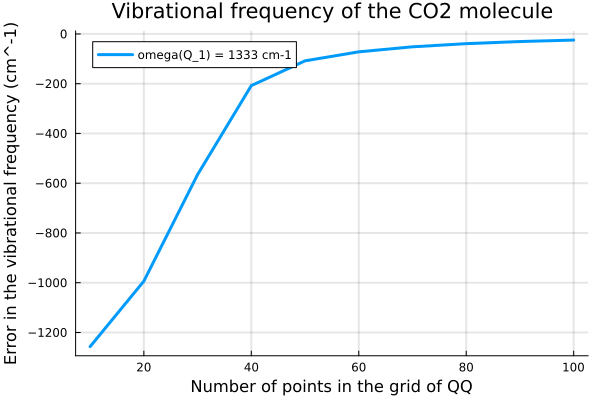

In [13]:
Npoints = [10,20,30,40,50,60,70,80,90,100]
error, p1 = convergence_test(Npoints, verbose=false)
plot(p1)

## Plot harmonic oscillator wavefunctions for a range of states

### Define function harmonic_oscillator_wavefunction(x, n, mu, omega)
Harmonic oscillator wavefunctions are defined in terms of Hermite polynomials as 
$$
\psi_n(x)=\frac{1}{\sqrt{2^n n !}}\left(\frac{\mu \omega}{\pi \hbar}\right)^{\frac{1}{4}} \exp \left(-\frac{\mu \omega x^2}{2 \hbar}\right) H_n\left(\sqrt{\frac{\mu \omega}{\hbar}} x\right)
$$

The following implementation is done in atomic units. 

In [14]:
using Polynomials, SpecialPolynomials

## Define harmonic_oscillator_wavefunction(x, n, m, omega):
# Hermite polynomials, https://en.wikipedia.org/wiki/Hermite_polynomials
# Julia Special Polynomials, https://docs.juliahub.com/SpecialPolynomials/LrhA0/0.1.0/

function harmonic_oscillator_wavefunction(x::Float64, n::Int, mu::Float64, omega::Float64)
    # Inputs:
    # x: position
    # n: quantum number
    # mu: reduced mass
    # omega: vibrational frequency
    # Returns:
    # psi: the harmonic wavefunction
    prefactor = sqrt(1/ (2^n * factorial(n))) * ((mu*omega) / pi)^0.25
    exponent = -0.5 * mu * omega * (x)^2
    herm = basis(Hermite, n)
    return prefactor * herm(sqrt(mu * omega) * x) * exp(exponent)
end

harmonic_oscillator_wavefunction (generic function with 1 method)

In [15]:
function w(n)
    wavefunction = [harmonic_oscillator_wavefunction(i, n, 1., 1.) for i in QQ_scaled]
    return wavefunction
end

w (generic function with 1 method)

### Plot harmonic oscillator wavefunctions

In [16]:
QQ = range(-1,1,length=n_points)
hbar = 1.0
alpha = sqrt(mu_co2 * omega / hbar)

QQ_scaled = [i*alpha for i in QQ]

println("alpha: ", alpha)

alpha: 18.819536437332918


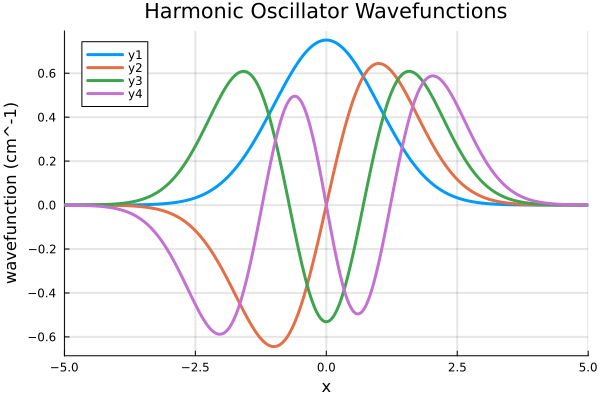

In [17]:
ex = [w(n) for n in 0:n_states-1]
plot(QQ_scaled, [ex], 
    lw=3,
    title="Harmonic Oscillator Wavefunctions",
    xlabel=("x"),
    ylabel=("wavefunction (cm^-1)"),
    xlimits=(-5,5),
    grid=gridlinewidth=2
    )

## Define creation and annihilation ladder operators

### Define function print_matrix(M)

In [18]:
using Printf

# Print output in formatted matrix 
function print_matrix(M)
    n = size(M)[1]
    for i in 1:n
        for j in 1:n
            @printf("%10.4f", M[i,j])
        end
        println()
    end
    println()
    return
end

print_matrix (generic function with 1 method)

### Define function creation_operator_matrix()

In [19]:
# Now create the matrix elements of the ladder operators
# Write the matrix elements of the creation operator in the harmonic basis
# Creation and annihilation operators, Wikipedia, https://en.wikipedia.org/wiki/Creation_and_annihilation_operators

# i is the row index
# j is the column index
# n*n is the dimension of the matrix

function creation_operator_matrix(n)
    matrix = zeros((n, n))
    for i in 1:n-1
        matrix[i+1,i] = sqrt(i)
    end
    return matrix
end

creation_operator_matrix (generic function with 1 method)

### Define function annihilation_operator_matrix()

In [20]:
function annihilation_operator_matrix(n)
    matrix = zeros((n, n))
    for i in 2:n
        matrix[i-1, i] = sqrt(i-1)
    end
    return matrix
end

annihilation_operator_matrix (generic function with 1 method)

### Test creation and annihilation ladder operators

In [21]:
ad = creation_operator_matrix(4)
show(stdout, "text/plain", ad)

4×4 Matrix{Float64}:
 0.0  0.0      0.0      0.0
 1.0  0.0      0.0      0.0
 0.0  1.41421  0.0      0.0
 0.0  0.0      1.73205  0.0

In [22]:
a = annihilation_operator_matrix(4)
show(stdout, "text/plain", a)

4×4 Matrix{Float64}:
 0.0  1.0  0.0      0.0
 0.0  0.0  1.41421  0.0
 0.0  0.0  0.0      1.73205
 0.0  0.0  0.0      0.0

In [23]:
show(stdout, "text/plain", conj(transpose(a))-ad)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

## References

[ChemTube3D] Vibrations of Carbon Dioxide, https://www.chemtube3d.com/vibrationsco2

[Demtröder] Atoms, Molecules and Photons, Wolfgang Demtröder, Second Edition, Springer, 9.5. Rotation and Vibration of Diatomic Molecules, Springer, ISBN-13: 978-3642102974

[Groenenboom 1] Prof. Gerrit C. Groenenboom, Quantum theoretical chemistry (NWI-MOL112), May 26, 2023, https://www.theochem.ru.nl/ctc2/pdf/qtclecture.pdf

[Groenenboom 2] Prof. Gerrit C. Groenenboom, Computational and Theoretical Chemistry 2, NWI-MOL176 (3EC),https://www.theochem.ru.nl/ctc2/

[jlapeyre] Qiskit-Extensions/QuantumOps.jl, Pauli and Fermionic operators implemented in Julia. qiskit-alt provides a Python/Qiskit front end to this package, https://github.com/Qiskit-Extensions/QuantumOps.jl

[Jordan-Wigner] Microsoft, Jordan-Wigner Representation, 10/13/2022, https://learn.microsoft.com/en-us/azure/quantum/user-guide/libraries/chemistry/concepts/jordan-wigner

[Julia_eigen] Julia linear algebra eigen function which solves a standard or generalized eigenvalue problem for a complex Hermitian or real symmetric matrix, https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.GeneralizedEigen

[Julia_bunchkaufman] Julia Linear Algebra bunchkaufman function computes the Bunch-Kaufman factorization of a symmetric matrix, https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.bunchkaufman 

[Keeper&Alain_Book] Keeper L. Sharkey, Alain Chancé, Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code, Packt Publishing, ISBN-13: 978-1803243900, https://amzn.eu/cDAR9sl

[MolSSI] Basis set convergence of molecular properties: Geometry and Vibrational Frequency, Molecular Sciences Software Institute (MolSSI), http://education.molssi.org/qm-tools/04-vib-freq/index.html

[mtfishman] ITensorChemistry.jl, https://github.com/mtfishman/ITensorChemistry.jl

[Psi4_0] Psi4 manual master index, https://psicode.org/psi4manual/master/index.html

[Psi4_1] Get Started with PSI4, https://psicode.org/installs/v15/[Psi4_2] Test case for Binding Energy of C4H5N (Pyrrole) with CO2 using MP2/def2-TZVPP, https://github.com/psi4/psi4/blob/master/samples/mp2-def2/input.dat